In [1]:
import pyreadr
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import scipy.cluster.hierarchy as sch

from dredFISH.Utils.__init__plots import *

# organize our data

In [2]:
f = "all_probes_sesame_normalized_annotated.h5ad"
adata_m = anndata.read(f)
print(adata_m.shape)

# select autosomes only
cond0 = adata_m.obs['CHR'].str.contains('[1-9]') 
adata_m = adata_m[cond0]
print(adata_m.shape)

# select unique probes only
adata_m = adata_m[adata_m.obs['havingReplicates']=='no']
print(adata_m.shape)

# use CGid as the probe names
# adata_m.obs.index = adata_m.obs['CGid'].astype(str).values #('CGid') # this direct changes are buggy
assert len(adata_m.obs['CGid'].unique()) == len(adata_m)
adata_m = anndata.AnnData(adata_m.X,
                          var=adata_m.var,
                          obs=adata_m.obs.set_index('CGid'),
                         )

adata_m

(326732, 12)
(298030, 12)
(291777, 12)


/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 291777 × 12
    obs: 'mammalianArrayProbes', 'mammalianProbesToUse.rmCor0.7Plus.ResMouseLessThan0.25.Calibration0.8Plus', 'havingReplicates', 'mapUniqWanding', 'SYMBOL', 'GeneRegionID', 'seqnames', 'probeStart', 'probeEnd', 'CGstart', 'CGend', 'width', 'strand', 'seq', 'annotation', 'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'transcriptId', 'distanceToTSS', 'flank_txIds', 'flank_geneIds', 'flank_gene_distances', 'genic', 'Intergenic', 'Promoter', 'fiveUTR', 'threeUTR', 'Exon', 'Intron', 'downstream', 'distal_intergenic', 'main_Categories', 'CpG_number_on_geneRegion', 'CpGs_number_on_gene', 'ENTREZID', 'ENSEMBL', 'conservationInHuman', 'CGIslandNess', 'CG', 'stackHMM', 'stackHMM.Rob', 'repeatElements', 'GENENAME', 'CpGislandseqnames', 'CpGislandstart', 'CpGislandend', 'CpGislandwidth', 'CpGislandstrand', 'CpGislandlen', 'CpGislandcount', 'CpGislandgc', 'CpGislandoe', 'CpGislandden', 'CpGislandpvalue', 'CpGisland', 'Brown_rat.corCa

In [3]:
adata_m.var

,OriginalOrderInBatch,ExternalSampleID,Age,ConfidenceInAgeEstimate,CanBeUsedForAgingStudies,SpeciesLatinName,SpeciesCommonName,Tissue,Female,Folder,...,LongNameProject,Sample_Well,Date,Well,GiovanniniNumber,DNA.Weight.mg,DNA.Concentration,AgeMonths,Sex,Genotype
Basename,,,,,,,,,,,,,,,,,,,,,
206535570066_R05C02,1,20147-9 #1,0.333333333,100,yes,Mus musculus,Mouse,Olfactory Bulb,0,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,C11,11/25/2020,A1,20147-9 #1,27.4,0.274,4.0,male,P0-CreC;Smarcb1(flox/flox)
206535570066_R06C02,2,20207-9 #1,0.416666667,100,yes,Mus musculus,Mouse,Olfactory Bulb,1,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,D11,11/25/2020,B1,20207-9 #1,9.7,0.097,5.0,female,P0-CreC;Smarcb1(flox/flox)
206535570010_R01C01,3,17016-9 #1,0.391666667,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,E11,11/30/2020,C1,17016-9 #1,9.7,0.097,4.7,female,P0-CreC;Smarcb1(flox/flox)
206535570010_R02C01,4,17100-9B #1,0.275,100,yes,Mus musculus,Mouse,Meninges,0,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,F11,11/30/2020,D1,17100-9B #1,10.2,0.102,3.3,male,P0-CreC;Smarcb1(flox/flox)
206535570010_R03C01,5,18161-10B #1,0.308333333,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,G11,11/30/2020,E1,18161-10B #1,4.7,0.047,3.7,female,P0-CreC;Smarcb1(flox/flox)
206535570010_R04C01,6,20074-9B #1,0.3,100,yes,Mus musculus,Mouse,Retro-orbital,1,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,H11,12/1/2020,F1,20074-9B #1,8.6,0.086,3.6,female,P0-CreC;Smarcb1(flox/flox)
206535570010_R05C01,7,20095-9 #1,0.416666667,100,yes,Mus musculus,Mouse,Optic nerve,0,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,A12,12/1/2020,G1,20095-9 #1,0.5,0.005,5.0,male,P0-CreC;Smarcb1(flox/flox)
206535570010_R06C01,8,20137-9 #1,0.258333333,100,yes,Mus musculus,Mouse,Olfactory bulb,0,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,B12,12/1/2020,H1,20137-9 #1,10.1,0.101,3.1,male,P0-CreC;Smarcb1(flox/flox)
206535570010_R01C02,9,20142-9 #1,0.366666667,100,yes,Mus musculus,Mouse,Nasal cavity,1,P39.ET0143BrianNa,...,Mammal320K_ET0158_ET0057_ET0120_ET0143_Plate1,C12,12/1/2020,A2,20142-9 #1,10.7,0.107,4.4,female,P0-CreC;Smarcb1(flox/flox)


In [4]:
mps = adata_m.obs.index.values
# ops = np.load('./data/m320k_i450k_overlap_5559.npy') # previous done -- including non-autosomes
# cps = np.intersect1d(mps, hps)  # actual overlap
# print(mps.shape, hps.shape, ops.shape, cps.shape)

In [5]:
adata_m_comm = adata_m[mps]
df_m = adata_m_comm.to_df()
df_m

Basename,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
CGid,,,,,,,,,,,,
cg00001209,0.709015,0.647783,0.642106,0.558514,0.670084,0.668660,0.692513,0.789740,0.638012,0.240190,0.714195,0.696545
cg00001364,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00002920,0.199709,0.117025,0.298558,0.272371,0.214564,0.189437,0.321178,0.354263,0.193437,0.308441,0.354261,0.384626
cg00003994,0.038456,0.030914,0.040603,0.039053,0.043289,0.042252,0.034478,0.025306,0.048871,0.034659,0.027721,0.035719
...,...,...,...,...,...,...,...,...,...,...,...,...
rs584222858,0.972834,0.978640,0.973054,0.970020,0.971030,0.971608,0.972993,0.969836,0.959897,0.963590,0.969499,0.968508
rs585463869,0.077149,0.066438,0.164561,0.132121,0.094628,0.111042,0.158151,0.118617,0.174783,0.255978,0.197121,0.118627
rs6153119,0.942738,0.960800,0.904534,0.892782,0.951701,0.926001,0.918742,0.925412,0.916453,0.899126,0.869296,0.923071


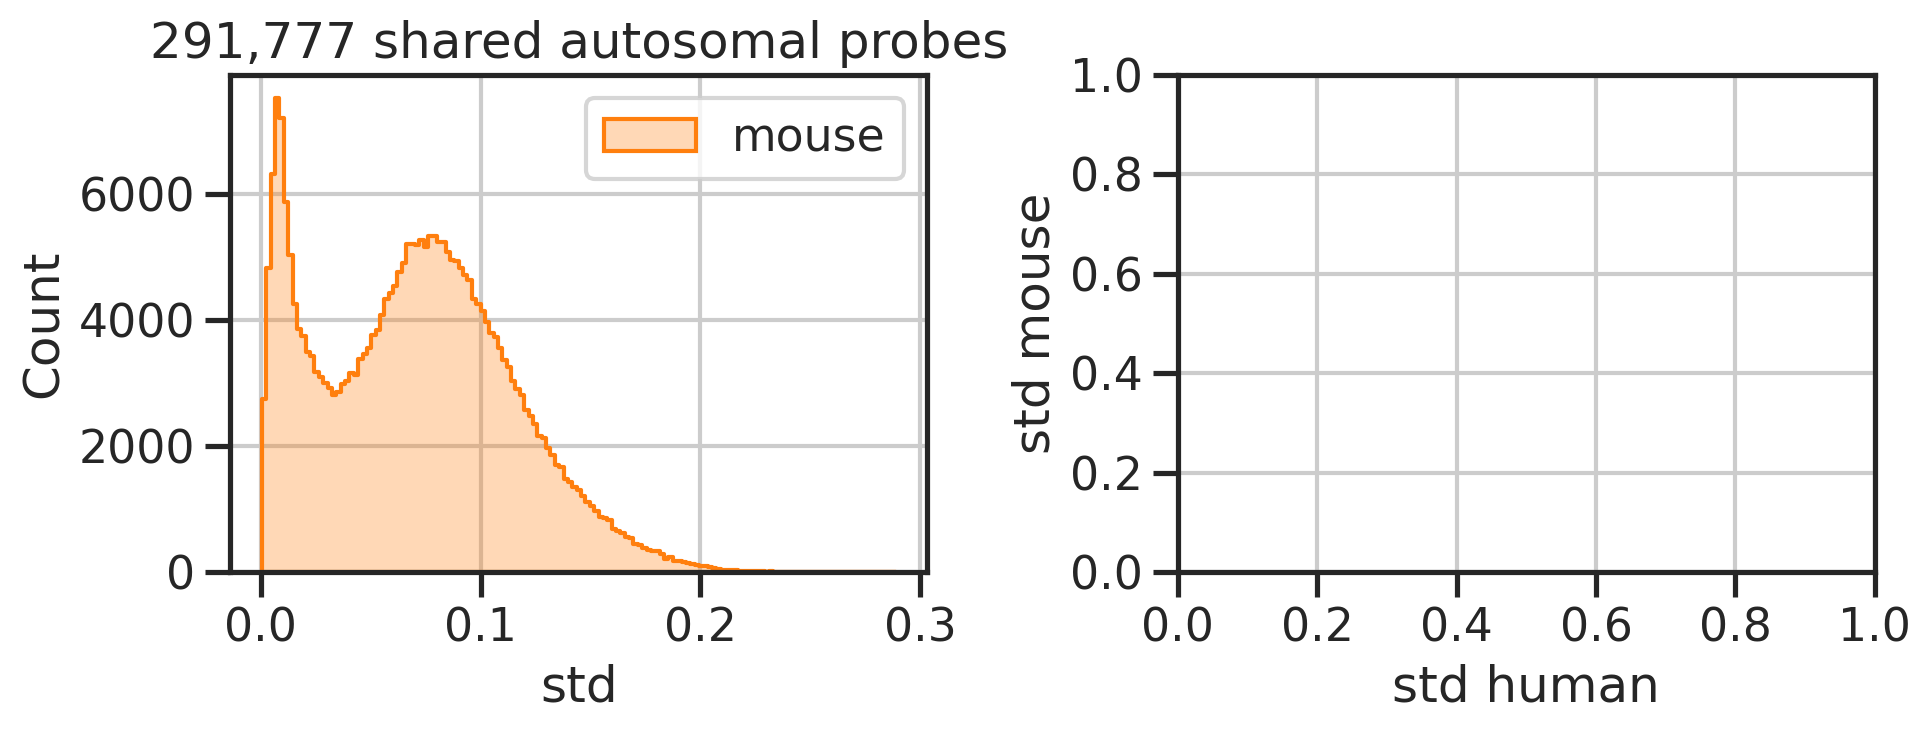

In [6]:
sites_std_m = df_m.std(axis=1, ddof=0)

# bins = np.arange(0,0.3+0.01,0.01)
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
sns.histplot(sites_std_m, ax=ax, element='step', color='C1', alpha=0.3, label='mouse')
ax.legend()
ax.set_xlabel('std')
ax.set_title(f"{len(sites_std_m):,} shared autosomal probes") 
               
ax = axs[1]
# ax.scatter(sites_std_h, sites_std_m, s=1)
ax.set_xlabel('std human')
ax.set_ylabel('std mouse')
fig.tight_layout()
plt.show()

In [7]:
th = 0.2
cond_m = sites_std_m > th
print(cond_m.sum())

cond = cond_m # np.logical_and(cond_h, cond_m)
print(cond.sum())

df_m_hv = df_m[cond]
print(df_m_hv.shape)

696
696
(696, 12)


In [8]:
rl_m = sch.linkage(df_m_hv.values,   method='average')
cl_m = sch.linkage(df_m_hv.values.T, method='average')

rord_m = np.array(sch.dendrogram(rl_m, no_plot=True)['leaves'])
cord_m = np.array(sch.dendrogram(cl_m, no_plot=True)['leaves'])

In [9]:
# sns.clustermap(df_h_hv.values, 
#                col_colors=pd.Series(clsts_order).astype(str).map(palette).values,
#                row_linkage=rl_h, 
#                col_linkage=cl_h, 
#                yticklabels=False,
#                xticklabels=False,
#                cmap='coolwarm', 
#                vmax=1, vmin=0,
#               )

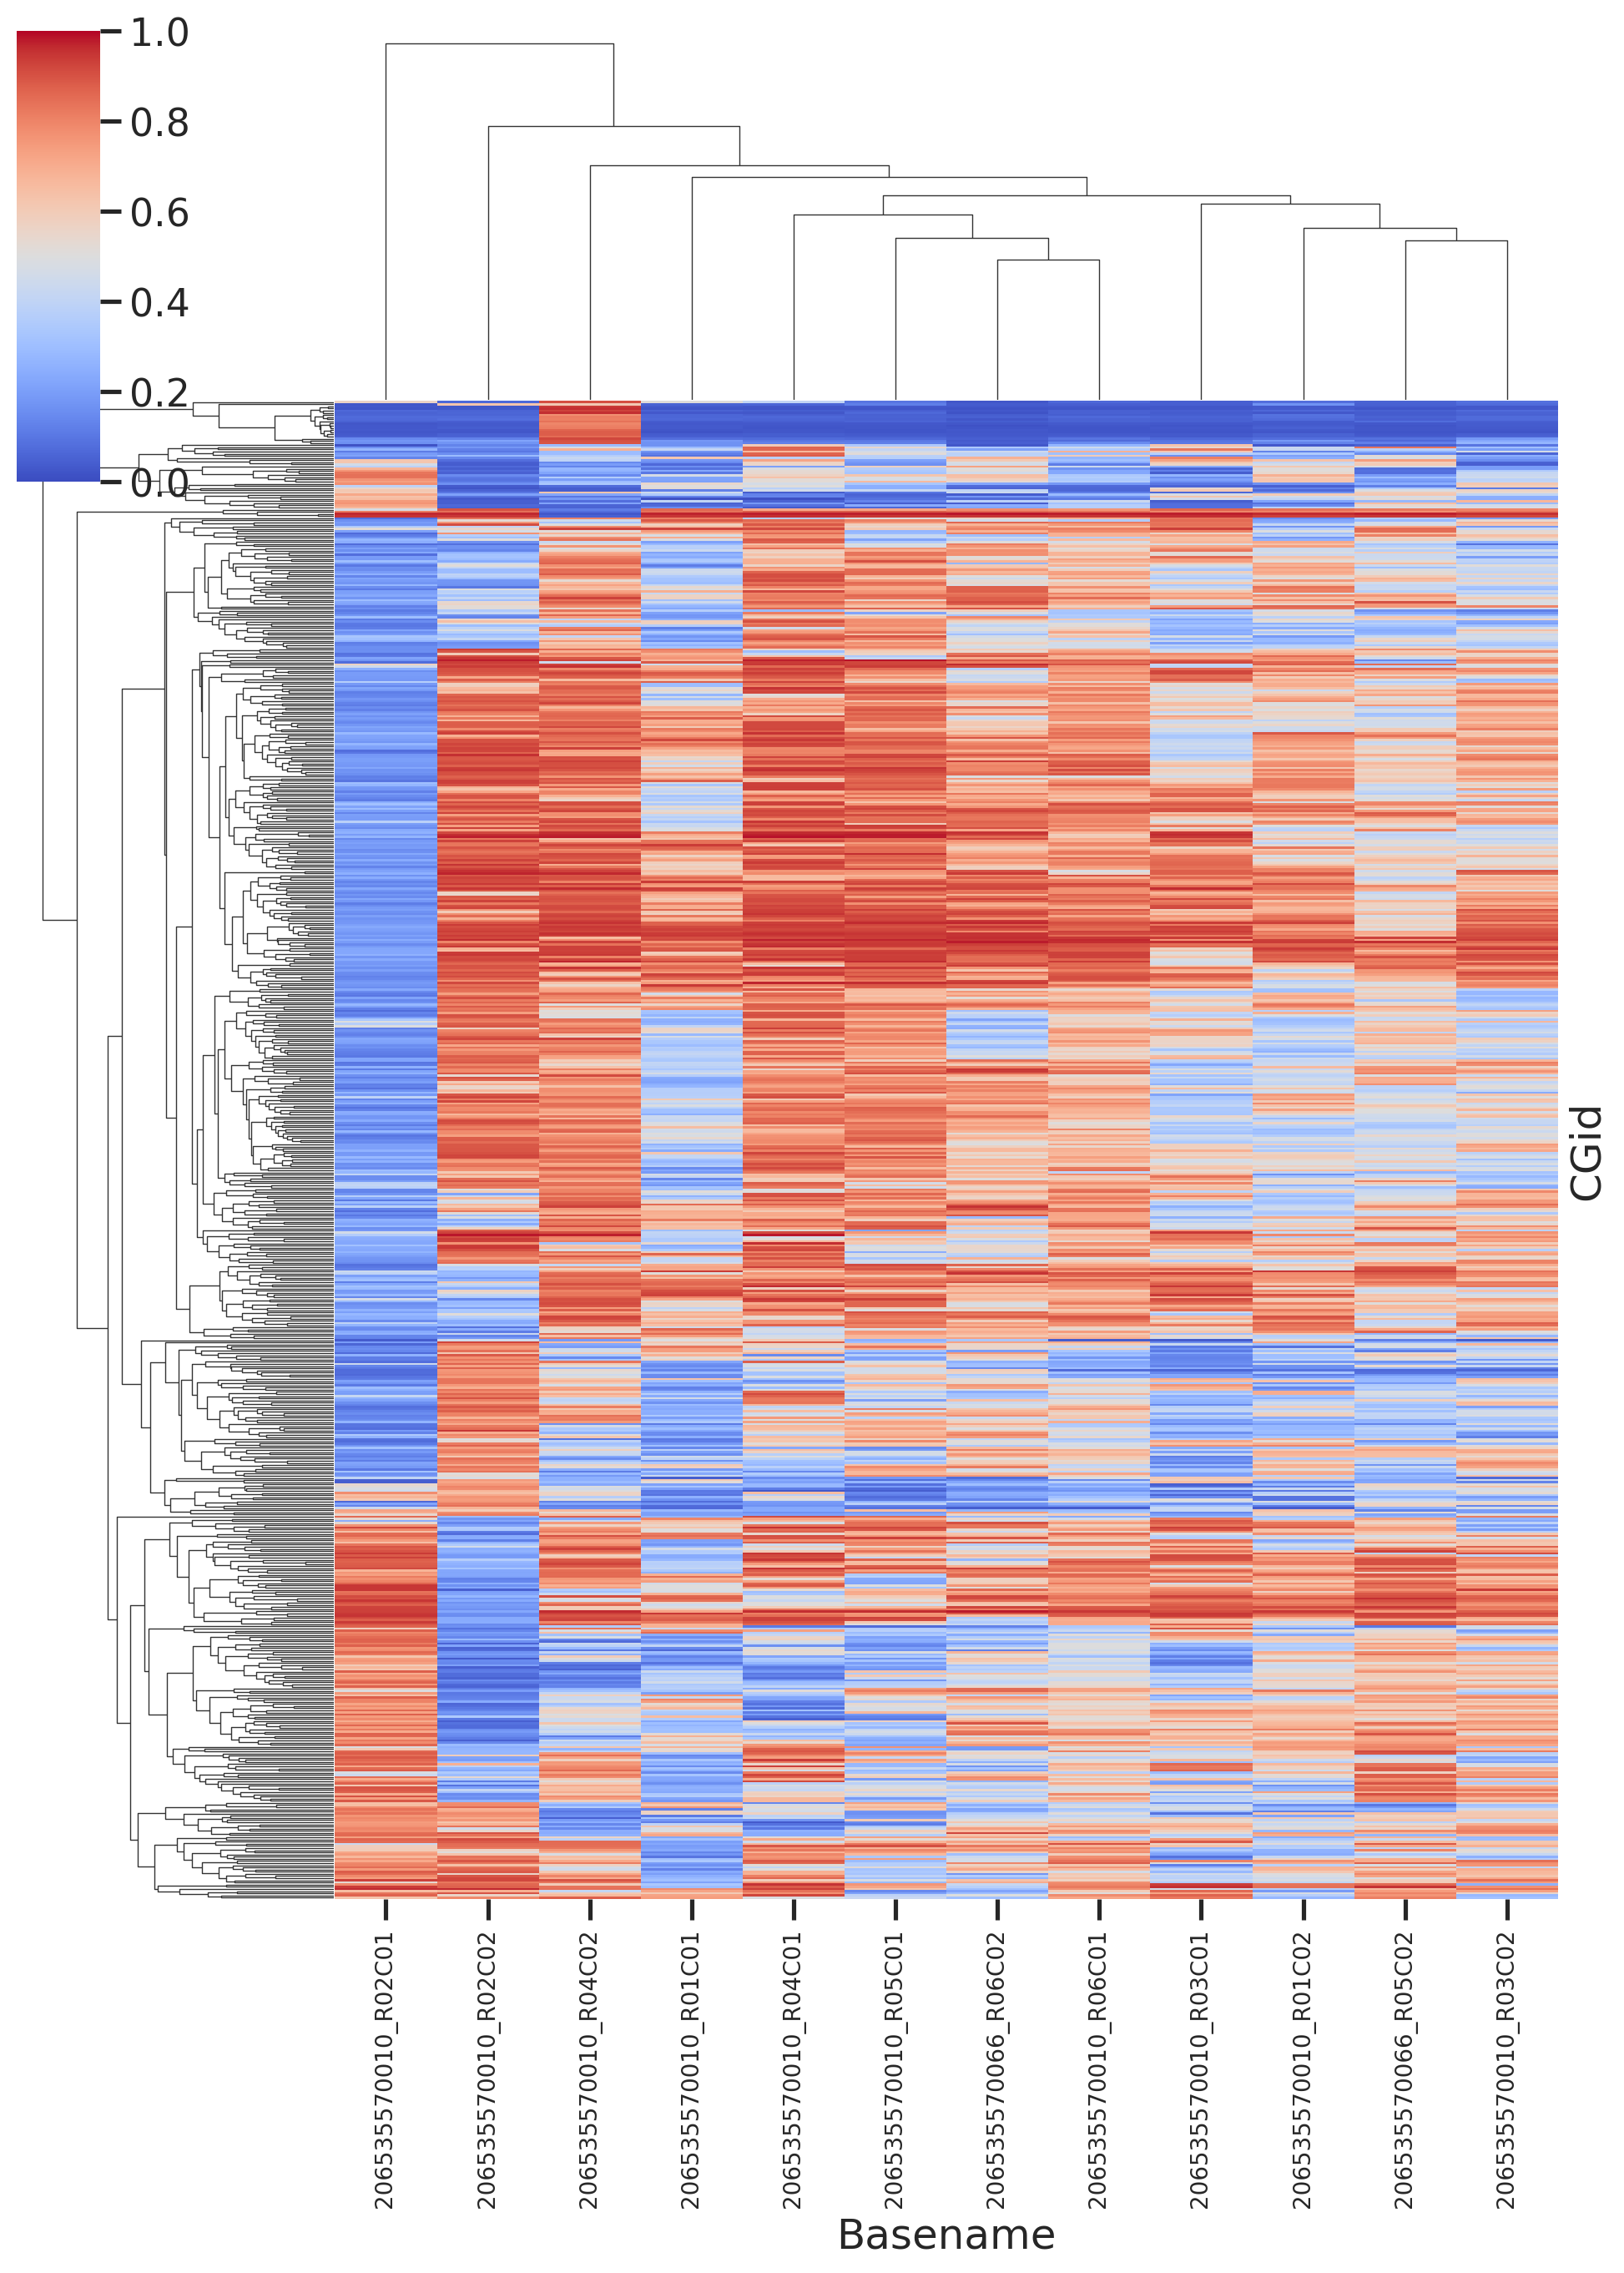

In [10]:
g = sns.clustermap(df_m_hv,#.values, 
               # col_colors=pd.Series(clsts_order).astype(str).map(palette).tolist()+['black']*df_m_hv.shape[1],
               yticklabels=False,
               # xticklabels=False,
               cmap='coolwarm', 
               vmax=1, vmin=0,
               figsize=(10,15),
              )
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=10)
plt.show()

In [11]:
topsites = sites_std_m.sort_values(ascending=False)

(10000, 12)


/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


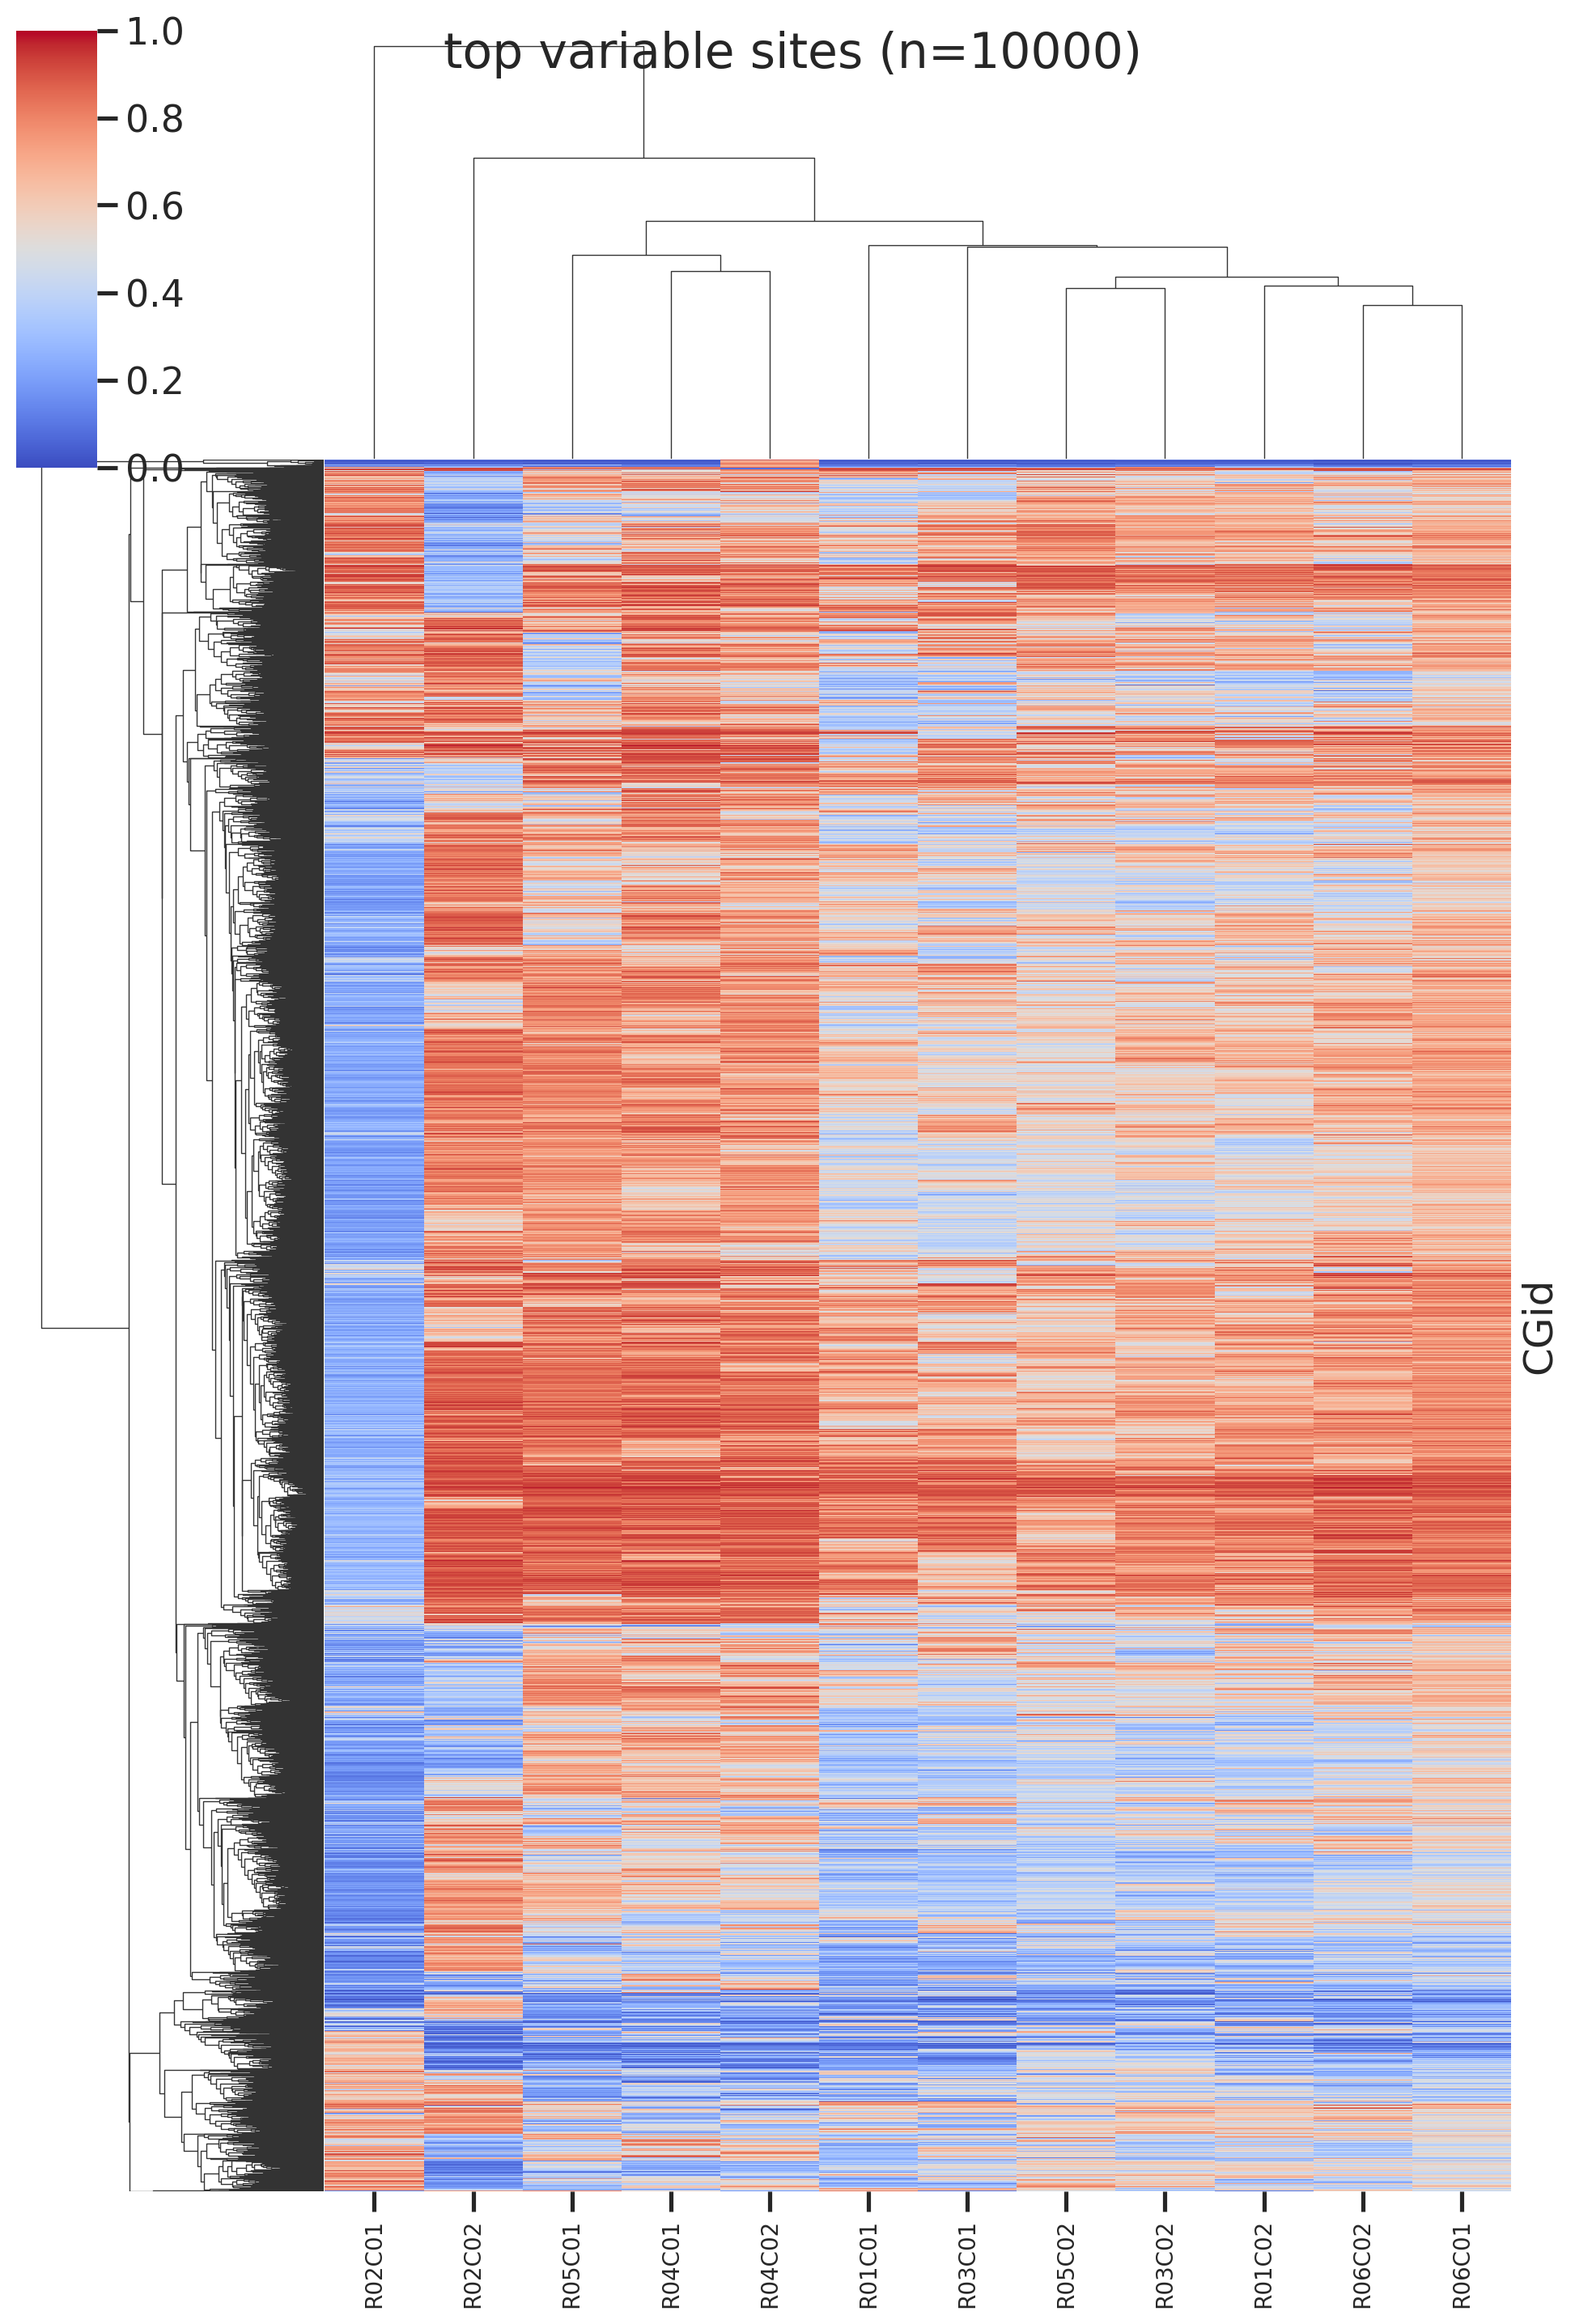

In [12]:
n_th = 10000
df_m_hv = df_m.loc[topsites.head(n_th).index].copy()
df_m_hv.columns = [name.split('_')[1] for name in df_m_hv.columns]
print(df_m_hv.shape)

g = sns.clustermap(df_m_hv,#.values, 
               # col_colors=pd.Series(clsts_order).astype(str).map(palette).tolist()+['black']*df_m_hv.shape[1],
               yticklabels=False,
               # xticklabels=False,
               cmap='coolwarm', 
               vmax=1, vmin=0,
               figsize=(10,15),
              )
g.fig.suptitle(f'top variable sites (n={n_th})')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=10)
plt.show()